# 3. MNIST Dataset Notebook
MNIST dataset notebook: a jupyter notebook explaining how to read the MNIST dataset efficiently into memory in Python.

<img src="img/mnist.png" style="width:200">

## THE MNIST DATABASE
MNIST stands for Modified National Institute of Standards and Technology, which refferes the NIST dataset which is a dataset of hand-printed characters.  The MNIST dataset consists of 60,000 training images and 10,000 testing images, half of each of these is made up of data from both the training set and the test set from NIST.

## Loading into Memory
https://docs.python.org/3/library/gzip.html

Because the files are in a .gzip format there needs to be a way to unarchive them to access the dataset.

Here I am using the gzip module in python to read the files

In [57]:
import gzip

The open() function reads a gzip-compressed file and returns it as a file object

### Reading the Images

In [58]:
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    content = f.read()

### Reading Labels

In [59]:
with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    labels = f.read()

## Checking the type & testing contents
### Images

In [60]:
type(content)

bytes

In [61]:
content[0:10]

b"\x00\x00\x08\x03\x00\x00'\x10\x00\x00"

### Labels

In [62]:
type(labels)

bytes

In [63]:
labels[0:10]

b"\x00\x00\x08\x01\x00\x00'\x10\x07\x02"

Now we know that the files have been downloaded and read properly

## Testing Single Image

The fist test here will be to read a single image and display it.
In the dataset each image is 786 bytes long.  The header info takes up the first 16 bytes of the file, which is why the first image ends at 800.

In [64]:
type(content[16:800])

bytes

## Display Image
In order to display the first image the bytes from 16 to 800 will need to be reshaped into an array.
Here we will be using the Numpy package to create the array

In [65]:
import numpy as np

In [66]:
image = np.array(list(content[16:800])).reshape(28,28).astype(np.uint8)

Using matplotlib to display the plots:

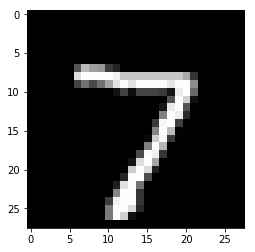

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(image, cmap='gray')

The MNIST images are white figures on a black background, with the '~' in python we are able to invert the images for a more readable look.

In [74]:
negativeImage = ~np.array(list(content[16:800])).reshape(28,28).astype(np.uint8)

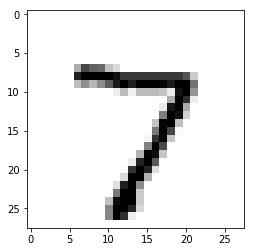

In [77]:
plt.imshow(negativeImage, cmap='gray')

## Display Label
Each label is one byte long and as with the images there is a header, this time 8 bytes long

In [79]:
int.from_bytes(labels[8:9], byteorder="big")

# or

# int.from_bytes(labels[8:9], byteorder="little")

7

## Converting bytes to int
The way that you want to convert bytes depends on the endianness or sequential order of the bytes.

Above we are converting the bytes from the labels file from type byte to int using big-endian format.
This means that the bytes are ordered from the position with the highest value (Most significant bit).

https://stackoverflow.com/questions/444591/convert-a-string-of-bytes-into-an-int-python

## Saving the Images
Next we are going to load the images into memory individually.
As stated above we know that the images has a header of 16 bytes and that each image is 786 bytes long.  Additionally the number of images is stored in the header from the 4th to the 8th bytes.

In [80]:
int.from_bytes(content[4:8], byteorder="big")

10000

Now we know that there are 1000 images in the file

In [81]:

# start
start = 16

# loop over 1000 images
for _ in range(1000):
    # store the image
    image = ~np.array(list(content[start:800])).reshape(28,28).astype(np.uint8)
    # store the label
    int.from_bytes(labels[8:9], byteorder="big")
    # concat start value
    start += 786


SyntaxError: unexpected EOF while parsing (<ipython-input-81-05ab58ceed20>, line 7)